# `ppqueue` Examples

![](https://img.fresh2.dev/1687407526_84b23a13b5f.svg)

## Install

Install from PyPi:

```python
pip install ppqueue[plot]
```

## enqueue, wait, dequeue

ppqueue runs parallel processes (or threads) using a Queue:

In [1]:
%reset -f

  0%|          | 0/18 [00:00<?, ?op/s]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289]


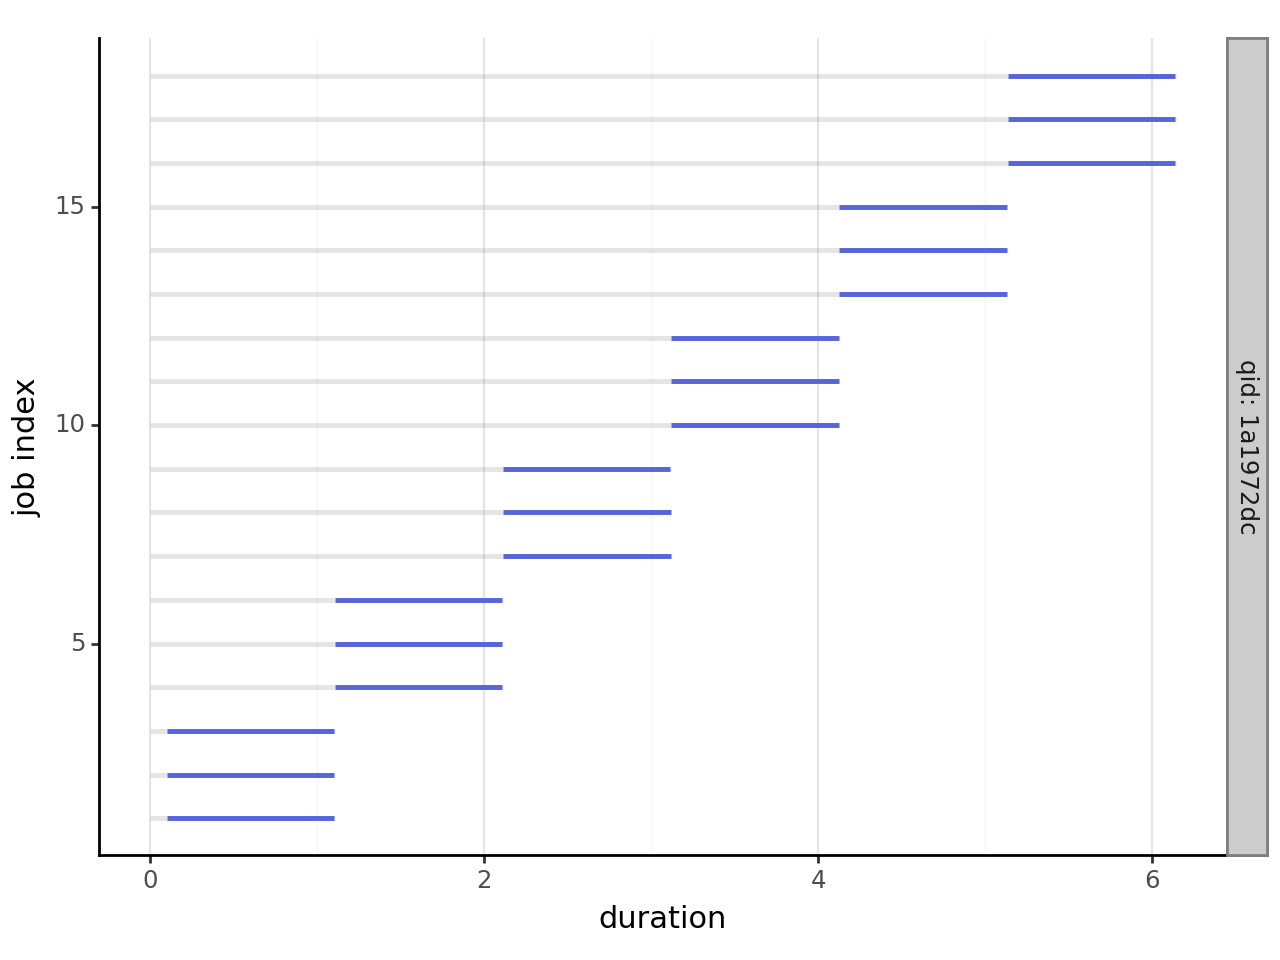

<Figure Size: (640 x 480)>

In [2]:
from ppqueue import Queue
from ppqueue.plot import plot_jobs


from time import sleep


def slowly_square(value: int, sleep_for: float) -> int:
    sleep(sleep_for)
    return value * value


with Queue(max_concurrent=3, show_progress=True) as queue:
    # enqueue
    for i in range(18):
        queue.enqueue(slowly_square, [i, 1])
        # OR: queue.put(slowly_square, ...)

    # wait
    queue.wait()

    # dequeue
    jobs = [queue.dequeue() for _ in range(queue.size())]
    # OR: jobs = [queue.pop() for _ in range(queue.size())]
    # OR: jobs = list(job for job in queue)
    # OR: jobs = queue.collect()

print([job.result for job in jobs])

# plot.
plot_jobs(jobs, no_legend=True)

## priority, group

ppqueue makes it easy to process jobs in priority-order. If jobs share the same priority value, then priority is given to the one that entered the queue first.

In [3]:
%reset -f

  0%|          | 0/18 [00:00<?, ?op/s]

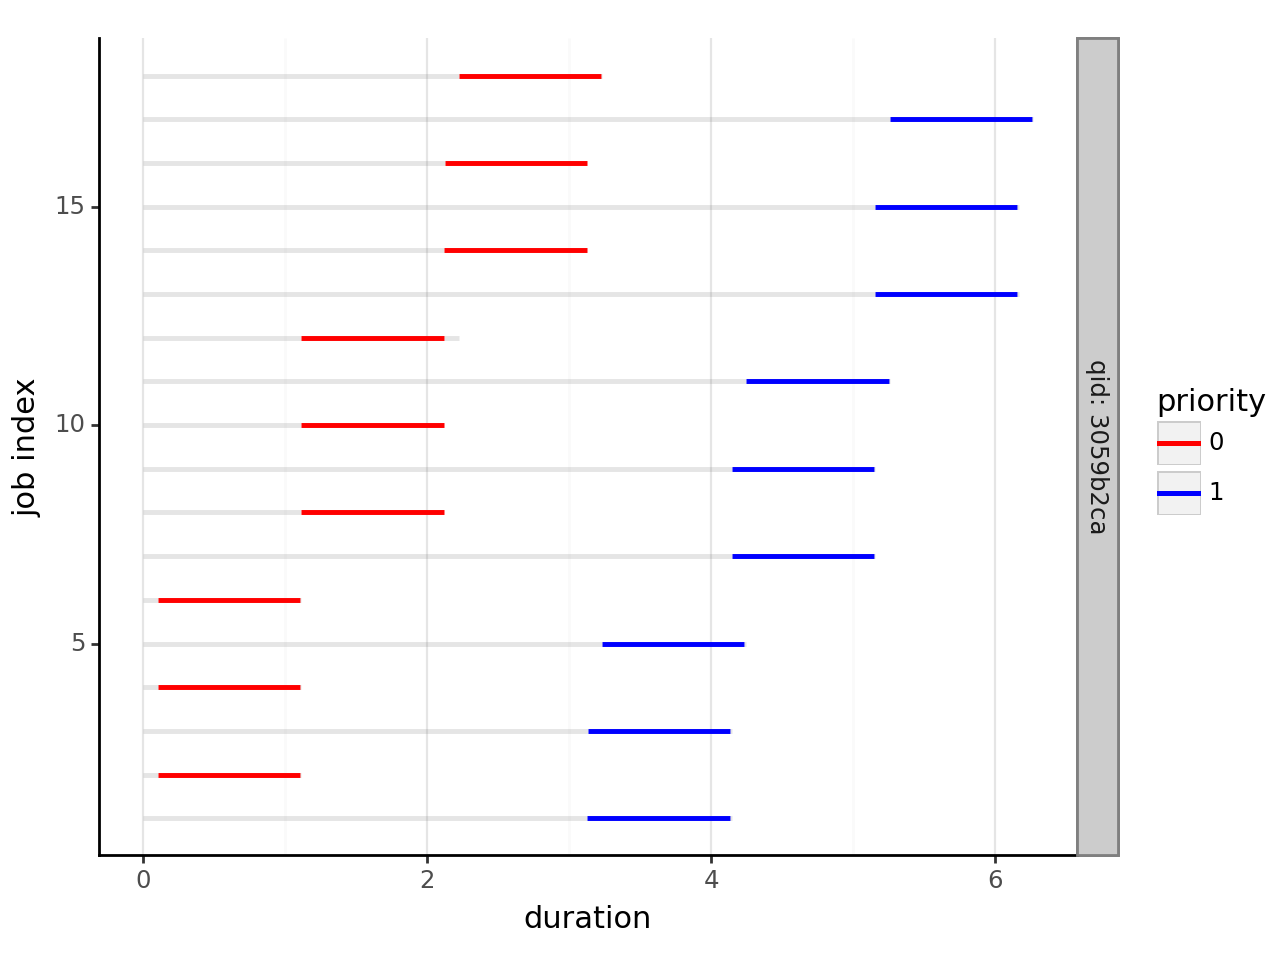

<Figure Size: (640 x 480)>

In [4]:
from ppqueue import Queue
from ppqueue.plot import plot_jobs, PlotColorBy


from time import sleep


with Queue(max_concurrent=3, show_progress=True) as queue:
    # put.
    for i in range(18):
        priority = int(i % 2 == 0)  # 0 has priority over 1
        queue.enqueue(sleep, [1], priority=priority)

    # wait.
    queue.wait()

    # collect.
    jobs = list(job for job in queue)
    # OR: jobs = [queue.dequeue() for _ in range(queue.size())]
    # OR: jobs = [queue.pop() for _ in range(queue.size())]
    # OR: jobs = queue.collect()

# plot.
plot_jobs(
    jobs,
    color_by=PlotColorBy.PRIORITY,
    color_pal=["red", "blue"],
)

You can define various "groups", where priority/order is respective to the group.

In [5]:
%reset -f

  0%|          | 0/18 [00:00<?, ?op/s]

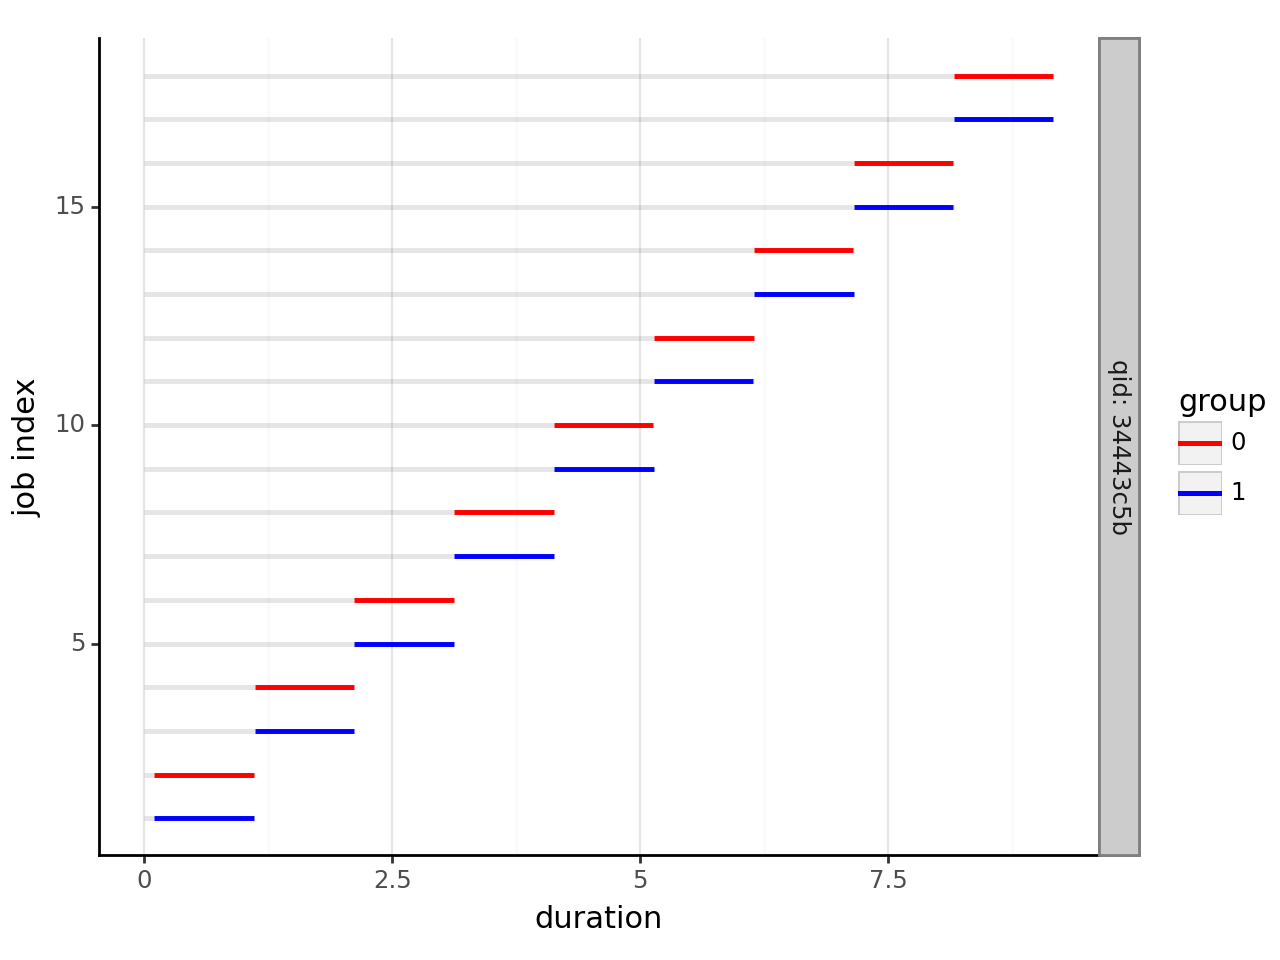

<Figure Size: (640 x 480)>

In [6]:
from ppqueue import Queue
from ppqueue.plot import plot_jobs, PlotColorBy


from time import sleep


with Queue(max_concurrent=3, show_progress=True) as queue:
    # put.
    for i in range(18):
        group = int(i % 2 == 0)  # Odds grouped with odds; evens with evens.
        queue.enqueue(sleep, [1], group=group)

    # wait.
    queue.wait()

    # collect.
    jobs = list(job for job in queue)
    # OR: jobs = [queue.dequeue() for _ in range(queue.size())]
    # OR: jobs = queue.collect()

# plot.
plot_jobs(
    jobs,
    color_by=PlotColorBy.GROUP,
    color_pal=["red", "blue"],
)

## map, starmap, starmapkw, decorator

ppqueue offers `map`, which is similar to the built-in `map()` function and the `multiprocessing.Pool.map()` function.

`map` runs the function for each item in the iterable (`enqueue`), waits until all jobs are complete (`wait`), and returns the results (`dequeue`).

For example, given 3 workers, 18 jobs, each job taking 1 second:

In [7]:
%reset -f

  0%|          | 0/18 [00:00<?, ?op/s]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289]


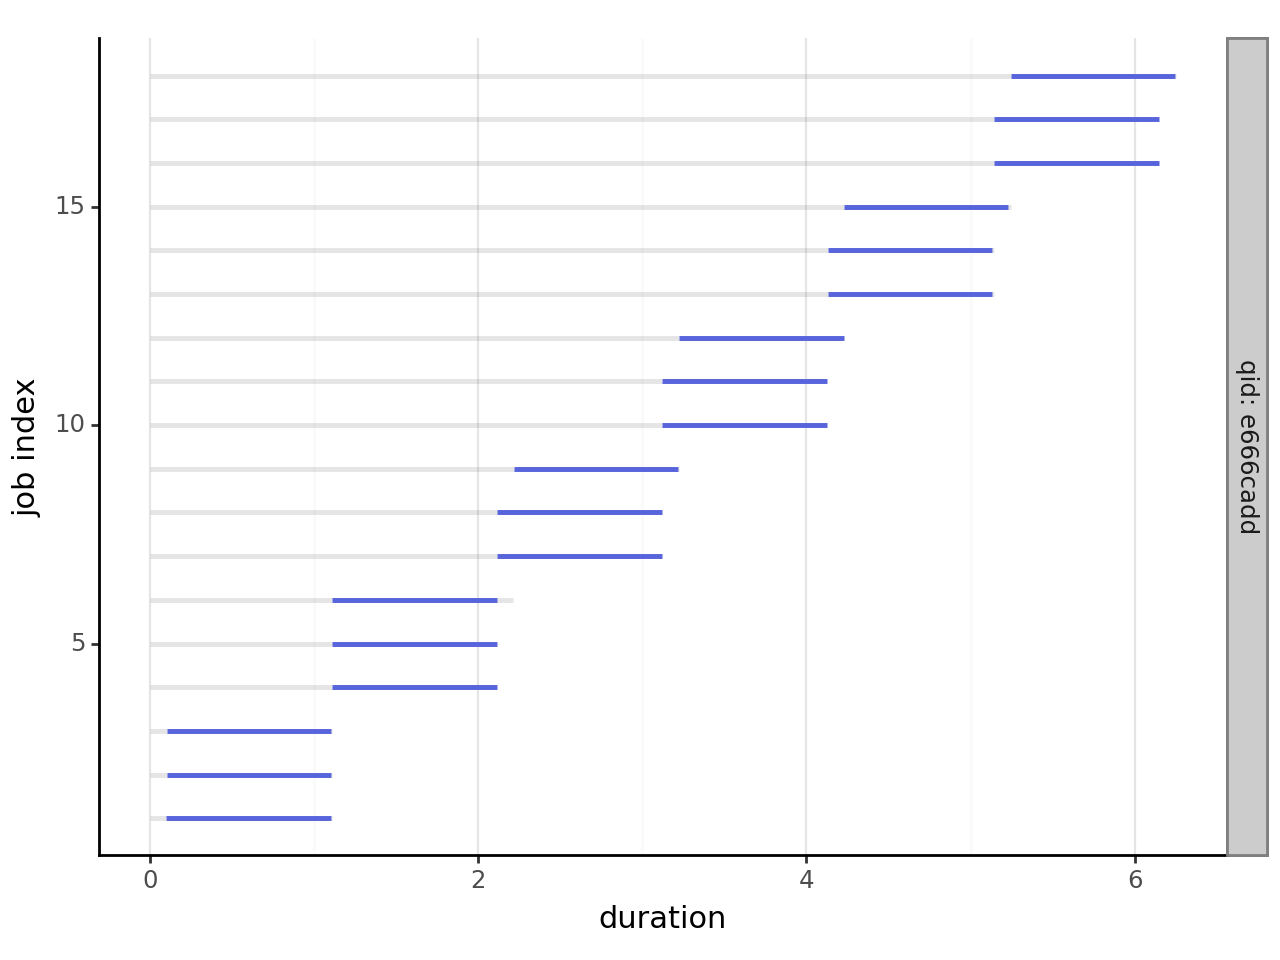

<Figure Size: (640 x 480)>

In [8]:
from ppqueue import Queue
from ppqueue.plot import plot_jobs


from time import sleep


def slowly_square(value: int, sleep_for: float = 1) -> int:
    sleep(sleep_for)
    return value * value


with Queue(max_concurrent=3, show_progress=True) as queue:
    # enqueue, wait, dequeue
    jobs = queue.map(slowly_square, range(18))

print([job.result for job in jobs])

# plot.
plot_jobs(jobs, no_legend=True)

Provide multiple arguments with `starmap`:

In [9]:
%reset -f

  0%|          | 0/18 [00:00<?, ?op/s]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289]


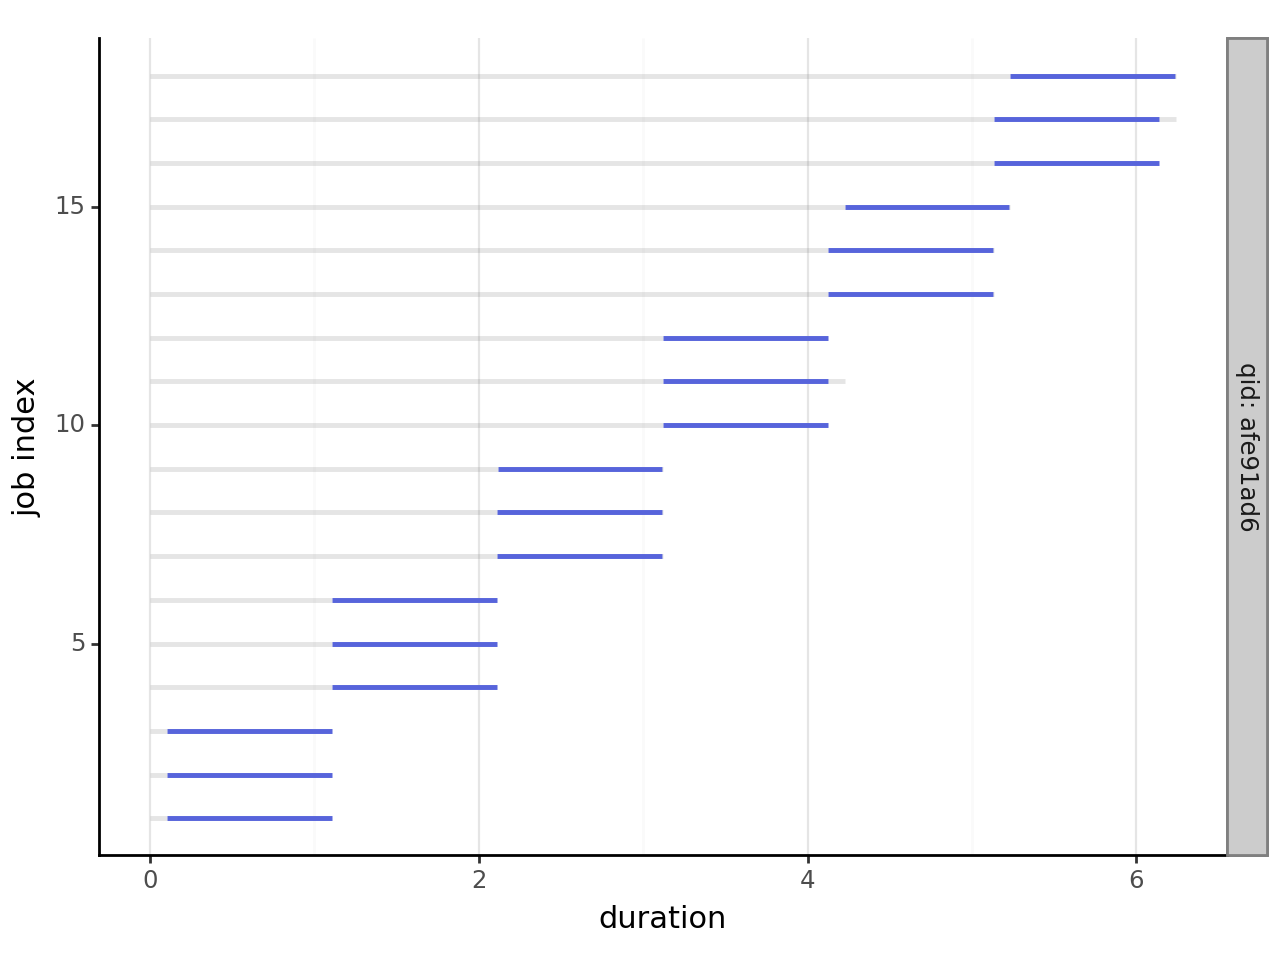

<Figure Size: (640 x 480)>

In [10]:
from ppqueue import Queue
from ppqueue.plot import plot_jobs


from time import sleep


def slowly_square(value: int, sleep_for: float) -> int:
    sleep(sleep_for)
    return value * value


with Queue(max_concurrent=3, show_progress=True) as queue:
    # enqueue, wait, dequeue
    jobs = queue.starmap(slowly_square, [(i, 1) for i in range(18)])

print([job.result for job in jobs])

# plot.
plot_jobs(jobs, no_legend=True)

Provide multiple *keyword* arguments with `starmapkw`:

In [11]:
%reset -f

  0%|          | 0/18 [00:00<?, ?op/s]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289]


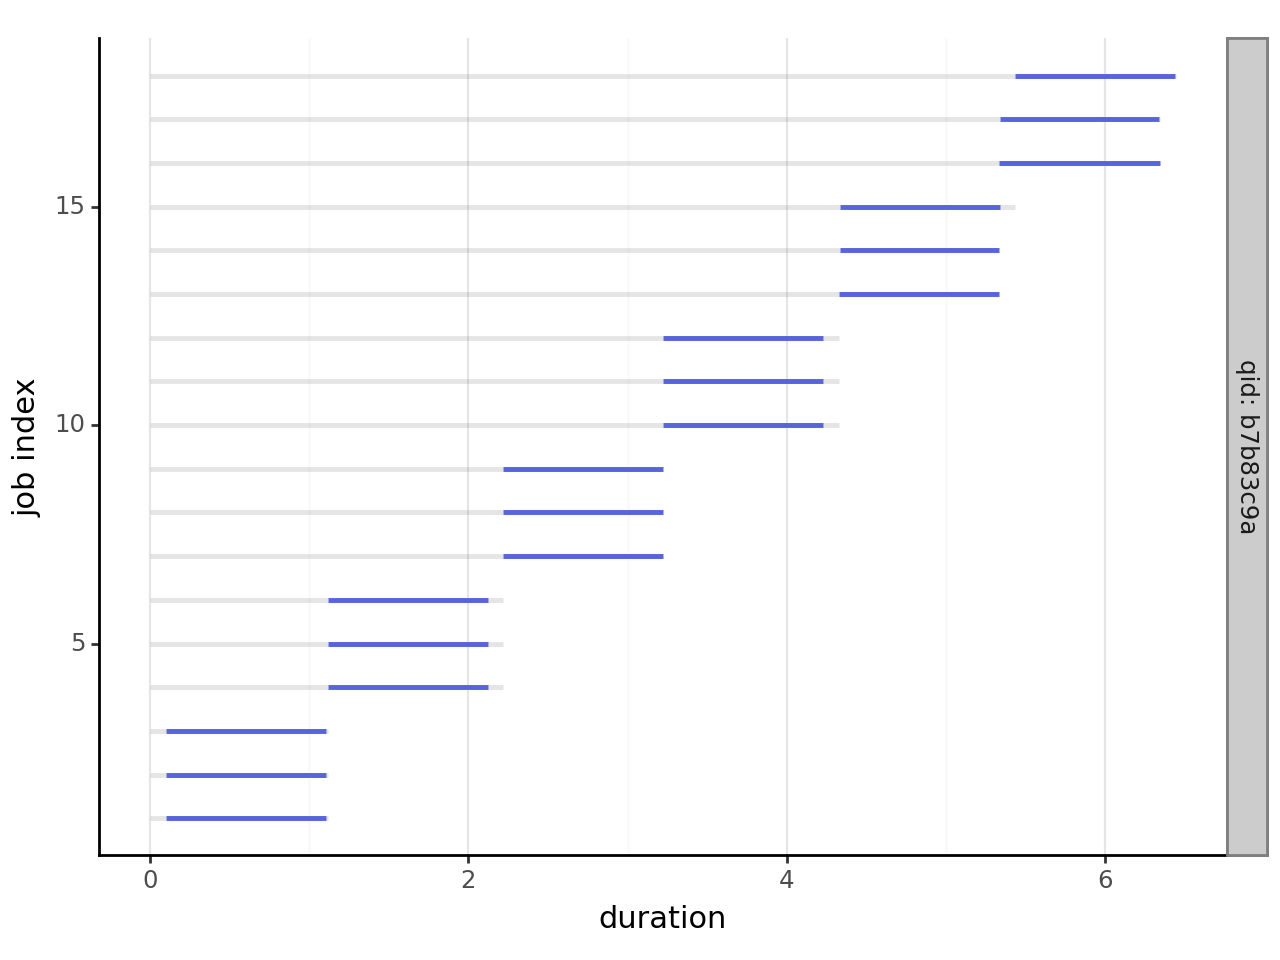

<Figure Size: (640 x 480)>

In [12]:
from ppqueue import Queue
from ppqueue.plot import plot_jobs


from time import sleep


def slowly_square(value: int, sleep_for: float) -> int:
    sleep(sleep_for)
    return value * value


with Queue(max_concurrent=3, show_progress=True) as queue:
    # enqueue, wait, dequeue
    jobs = queue.starmapkw(
        slowly_square,
        [{"value": i, "sleep_for": 1} for i in range(18)],
    )

print([job.result for job in jobs])

# plot.
plot_jobs(jobs, no_legend=True)

You can also use the `@Queue` decorator for this sorta thing:

In [13]:
%reset -f

  0%|          | 0/18 [00:00<?, ?op/s]

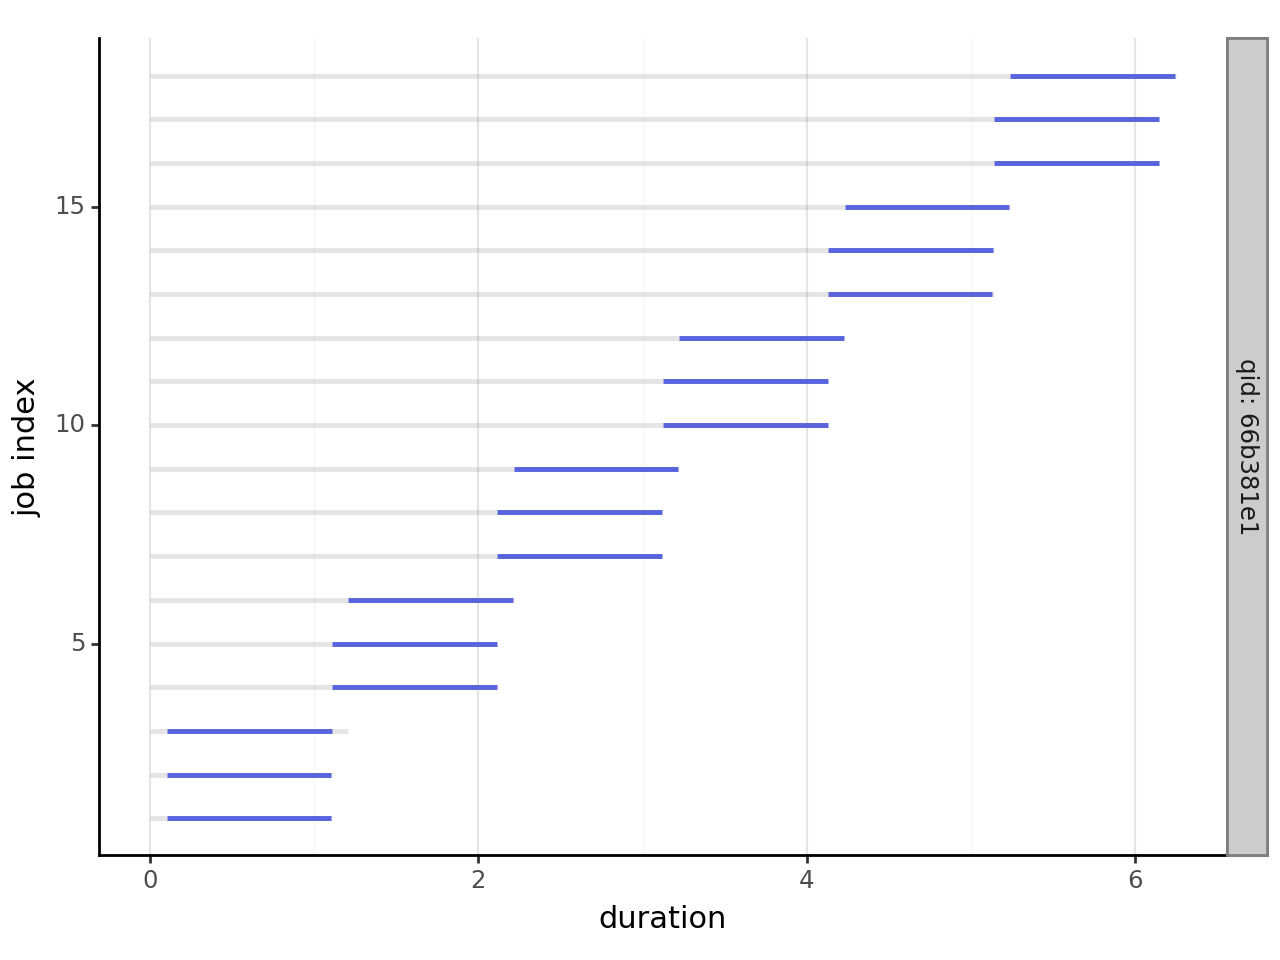

<Figure Size: (640 x 480)>

In [14]:
from ppqueue import Queue
from ppqueue.plot import plot_jobs

from time import sleep


@Queue(max_concurrent=3, show_progress=True)
def sleep_foreach(x: float):
    sleep(x)


# call and collect.
jobs = sleep_foreach([1] * 18)

# plot.
plot_jobs(jobs, no_legend=True)

## Threads and Processes

It's easy to use processes (`mp.Process`) or threads (`threading.Thread`).

In [15]:
%reset -f

  0%|          | 0/18 [00:00<?, ?op/s]

  0%|          | 0/18 [00:00<?, ?op/s]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289]
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289]


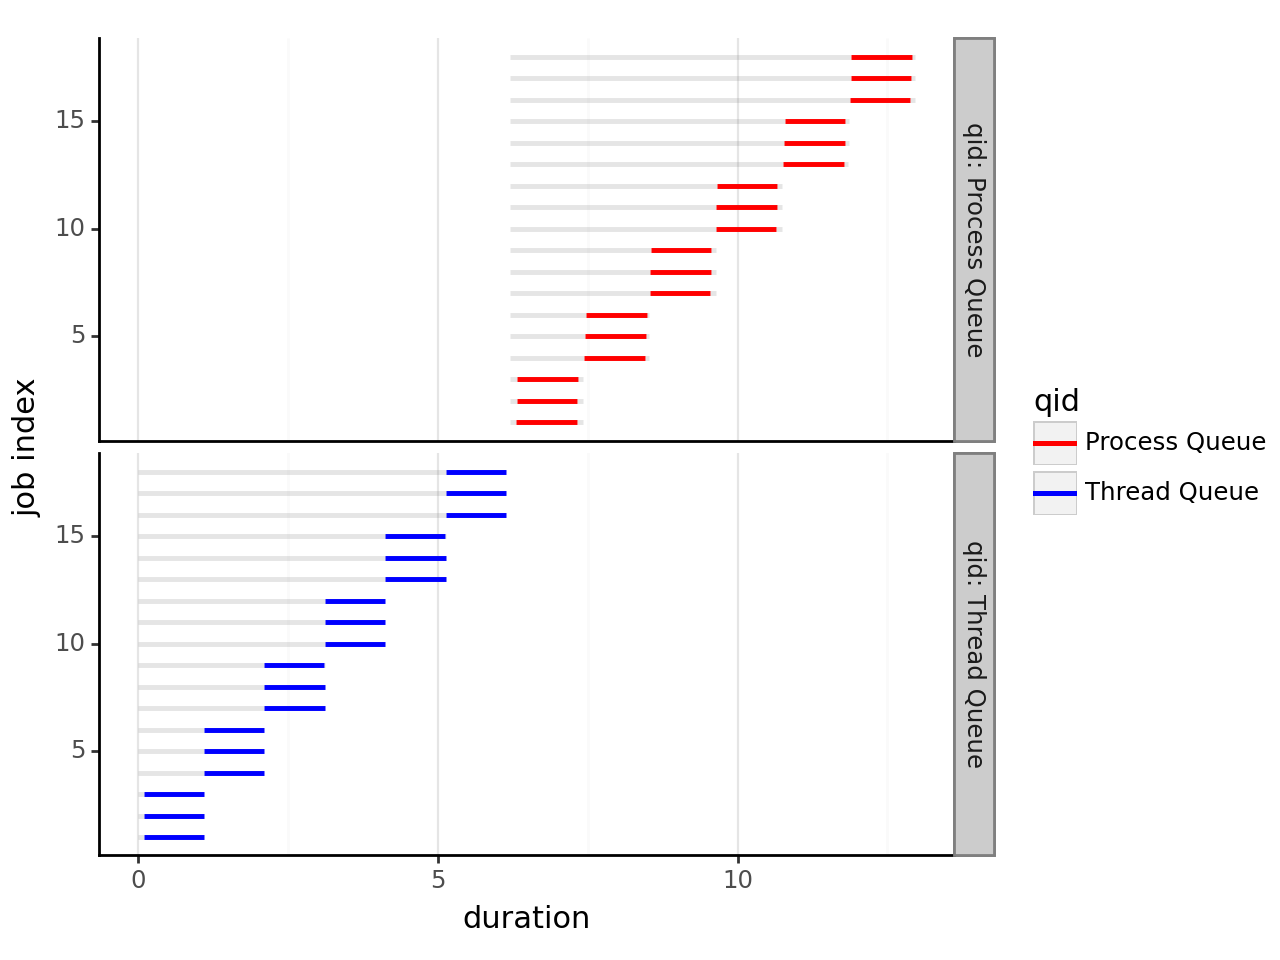

<Figure Size: (640 x 480)>

In [16]:
from ppqueue import Queue
from ppqueue.plot import plot_jobs, PlotColorBy

from threading import Thread
from multiprocessing import Process
from time import sleep


def slowly_square(value: int, sleep_for: float = 1) -> int:
    sleep(sleep_for)
    return value * value


with Queue(
    max_concurrent=3,
    show_progress=True,
    engine=Thread,
    name="Thread Queue",
) as queue:
    thread_jobs = queue.map(slowly_square, range(18))

with Queue(
    max_concurrent=3,
    show_progress=True,
    engine=Process,
    name="Process Queue",
) as queue:
    process_jobs = queue.map(slowly_square, range(18))

print([job.result for job in thread_jobs])
print([job.result for job in process_jobs])

# plot.
plot_jobs(
    thread_jobs,
    process_jobs,
    color_by=PlotColorBy.QID,
    color_pal=["red", "blue"],
)

## More Examples

More examples can be found in the reference docs:

https://www.f2dv.com/code/r/ppqueue/i/reference/